In [1]:

import statistics
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition

In [2]:

training_set = pd.read_csv("train.csv")

columns = training_set.columns
columns






Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:

training_set['gender'] = training_set['gender'].replace(dict(Counter(training_set["gender"])))
training_set['SeniorCitizen'] = training_set['SeniorCitizen'].replace(dict(Counter(training_set["SeniorCitizen"])))
training_set['Partner'] = training_set['Partner'].replace(dict(Counter(training_set["Partner"])))
training_set['Dependents'] = training_set['Dependents'].replace(dict(Counter(training_set["Dependents"])))
training_set['PhoneService'] = training_set['PhoneService'].replace(dict(Counter(training_set["PhoneService"])))
training_set['PaperlessBilling'] = training_set['PaperlessBilling'].replace(dict(Counter(training_set["PaperlessBilling"])))
training_set['MultipleLines'] = training_set['MultipleLines'].replace(dict(Counter(training_set["MultipleLines"])))
training_set['InternetService'] = training_set['InternetService'].replace(dict(Counter(training_set["InternetService"])))
training_set['OnlineSecurity'] = training_set['OnlineSecurity'].replace(dict(Counter(training_set["OnlineSecurity"])))
training_set['OnlineBackup'] = training_set['OnlineBackup'].replace(dict(Counter(training_set["OnlineBackup"])))
training_set['DeviceProtection'] = training_set['DeviceProtection'].replace(dict(Counter(training_set["DeviceProtection"])))
training_set['TechSupport'] = training_set['TechSupport'].replace(dict(Counter(training_set["TechSupport"])))
training_set['StreamingTV'] = training_set['StreamingTV'].replace(dict(Counter(training_set["StreamingTV"])))
training_set['StreamingMovies'] = training_set['StreamingMovies'].replace(dict(Counter(training_set["StreamingMovies"])))
training_set['Contract'] = training_set['Contract'].replace(dict(Counter(training_set["Contract"])))
training_set['PaymentMethod'] = training_set['PaymentMethod'].replace(dict(Counter(training_set["PaymentMethod"])))
training_set['Churn'] = training_set['Churn'].replace({'Yes': 1, 'No': 0})
training_set["tenure"] = training_set["tenure"].astype(np.float64)
training_set["MonthlyCharges"] = training_set["MonthlyCharges"].fillna(training_set["MonthlyCharges"].mean())

total_charges = training_set["TotalCharges"].tolist()
values = []
for tc in total_charges:
    if tc is not " ":
      values.append(float(tc))


        
training_set["TotalCharges"] = training_set["TotalCharges"].replace({' ': statistics.mean(values)})


# training_set.isnull().sum()



training_set.to_csv("preprocessed_data.csv", index=False)


In [4]:
training_set.isnull().sum()


labels = training_set['Churn'].tolist()

del training_set['Churn']

training_set.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [5]:
features = np.array(training_set)
labels = np.array(labels)

/home/ahmed/PycharmProjects/installingthings /venv/lib/python3.6/site-packages/plotly/express/_core.py:128: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



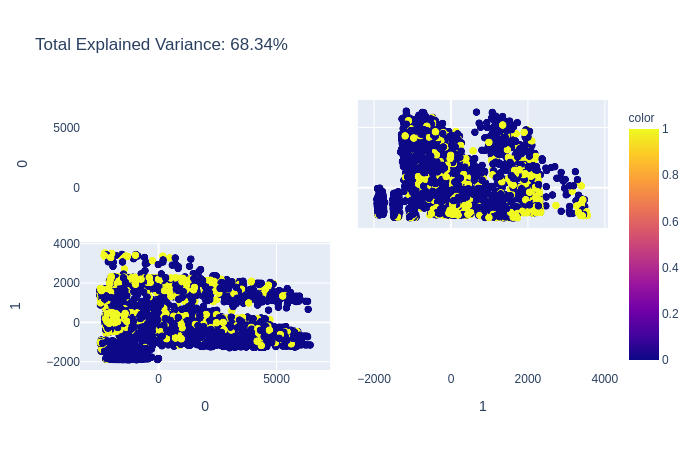

In [6]:

import plotly.express as px
from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components=n_components)
components = pca.fit_transform(features)

total_var = pca.explained_variance_ratio_.sum() * 100


fig = px.scatter_matrix(
    components,
    color=labels,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show("png")

[0.788001 0.211999]


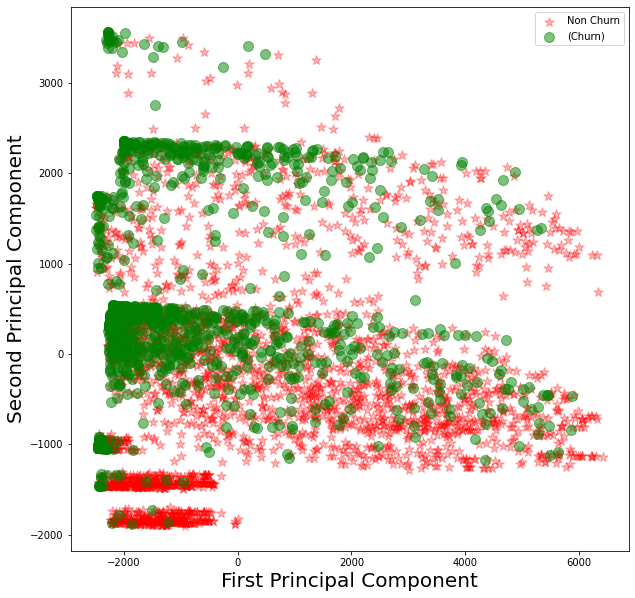

In [7]:

pca = decomposition.PCA(n_components=2)
pca.fit(features)
X_pca = pca.transform(features)


ex_variance = np.var(X_pca, axis=0)
ex_variance_ratio = ex_variance / np.sum(ex_variance)
print(ex_variance_ratio)

Xax = X_pca[:, 0]
Yax = X_pca[:, 1]

cdict = {0: 'red', 1: 'green'}
labl = {0: 'Non Churn', 1: '(Churn)'}
marker = {0: '*', 1: 'o'}
alpha = {0: .3, 1: .5}
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix = np.where(labels == l)
    ax.scatter(Xax[ix], Yax[ix], c=cdict[l], s=100,
               label=labl[l], marker=marker[l], alpha=alpha[l])


px.scatter()
# for loop ends
plt.xlabel("First Principal Component", fontsize=20)
plt.ylabel("Second Principal Component", fontsize=20)
plt.legend()
plt.show()


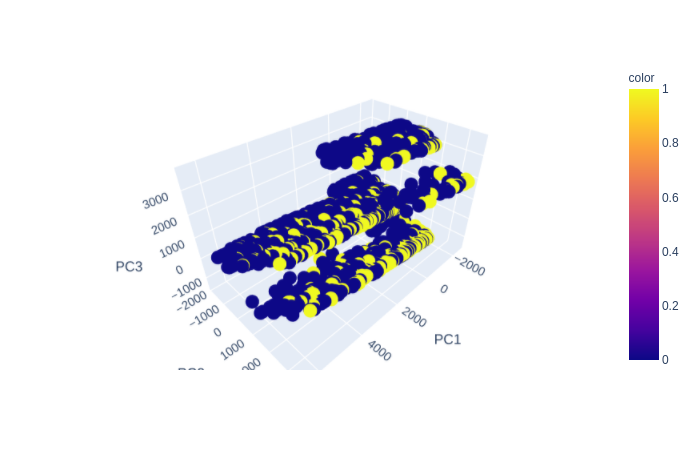

In [9]:
pca = PCA(n_components=3)
components = pca.fit_transform(features)
fig = px.scatter_3d(components, x=0, y=1, z=2, color=labels,
labels={'0':'PC1', '1':'PC2', '2':'PC3'})
fig.show("png")

